# Examining Features thats impacts Warfarin Does with Freature Importance
---

## Load Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/cleaned_data.csv', index_col='PharmGKB Subject ID')
df

,Height (cm),Weight (kg),Subject Reached Stable Dose of Warfarin,Therapeutic Dose of Warfarin,INR on Reported Therapeutic Dose of Warfarin,Diabetes,Congestive Heart Failure and/or Cardiomyopathy,Valve Replacement,Aspirin,Acetaminophen or Paracetamol (Tylenol),...,Gender_male,Age_10 - 19,Age_20 - 29,Age_30 - 39,Age_40 - 49,Age_50 - 59,Age_60 - 69,Age_70 - 79,Age_80 - 89,Age_90+
PharmGKB Subject ID,,,,,,,,,,,,,,,,,,,,,
PA135312261,193.04,115.70,1.0,49.00,2.60,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
PA135312262,176.53,144.20,1.0,42.00,2.15,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
PA135312263,162.56,77.10,1.0,53.00,1.90,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
PA135312264,182.24,90.70,1.0,28.00,2.40,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
PA135312265,167.64,72.60,1.0,42.00,1.90,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA152407680,165.10,86.36,1.0,35.00,3.00,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
PA152407682,160.02,55.91,1.0,27.51,2.80,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
PA152407683,187.96,97.73,1.0,57.47,2.00,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3989 entries, PA135312261 to PA152407685
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Height (cm)                                     3989 non-null   float64
 1   Weight (kg)                                     3989 non-null   float64
 2   Subject Reached Stable Dose of Warfarin         3989 non-null   float64
 3   Therapeutic Dose of Warfarin                    3989 non-null   float64
 4   INR on Reported Therapeutic Dose of Warfarin    3989 non-null   float64
 5   Diabetes                                        3989 non-null   float64
 6   Congestive Heart Failure and/or Cardiomyopathy  3989 non-null   float64
 7   Valve Replacement                               3989 non-null   float64
 8   Aspirin                                         3989 non-null   float64
 9   Acetaminophen or Paracetamol 

---
# Machine Learning Methods for Feature Importance
---

In [4]:
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [5]:
def eval_model(y_test, y_pred):
    print("R² score:", r2_score(y_test, y_pred))
    print("RMSE:", root_mean_squared_error(y_test, y_pred))   

In [6]:
def importance(model, X, Type=['linear', 'tree'], Dict=None, idx_name=None):
    if Type == 'linear':
        importance = pd.DataFrame(model.coef_, index=X.columns, columns=['Importance'])
    elif Type == 'tree':
        importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
    else:
        raise ValueError("Type must be 'linear' or 'tree'")

    importance.sort_values(by='Importance', ascending=False, inplace=True)

    total_width = 100
    print("Feature Importances".center(total_width, '-'))
    print(f"{'Feature':<80} {'Importance':>15}")
    for i, row in importance.iterrows():
        print(f"{i:<80} {row['Importance']:>15.6f}")
    
    if Dict != None:
        if idx_name != None:
            Dict.setdefault('Model', [])
            Dict['Model'].append(idx_name)
        else:
            Dict.setdefault('Model', [])
            Dict['Model'].append(len(Dict['Model']) + 1)

        for i in importance.index:
            Dict.setdefault(i, [])
            Dict[i].append(importance.loc[i, 'Importance'])
        
        return Dict

In [7]:
importance_dict = {}

## Tree Based

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['INR on Reported Therapeutic Dose of Warfarin', 'Therapeutic Dose of Warfarin']),
    df['INR on Reported Therapeutic Dose of Warfarin'],
    test_size=0.2,
    train_size=0.8,
    random_state=42,
)

### 1. Decision Tree Regressor

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
DTReg = DecisionTreeRegressor(random_state=42)
DTReg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [11]:
y_pred = DTReg.predict(X_test)
eval_model(y_test, y_pred)

R² score: -0.7191536358206403
RMSE: 0.5841944682139067


In [12]:
importance_dict = importance(DTReg, X_train, 'tree', importance_dict, "DecisionTreeRegressor")

----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.301581
Height (cm)                                                                             0.241731
Subject Reached Stable Dose of Warfarin                                                 0.040187
Gender_male                                                                             0.031468
Valve Replacement                                                                       0.031056
Other                                                                                   0.029814
Age_60 - 69                                                                             0.029451
Age_70 - 79                                                                             0.028017
Aspirin                   

### 2. Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
RFReg = RandomForestRegressor(random_state=42)
RFReg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [15]:
y_pred = RFReg.predict(X_test)
eval_model(y_test, y_pred)

R² score: 0.04855063231998247
RMSE: 0.43460321645279676


In [16]:
importance_dict = importance(RFReg, X_train, 'tree', importance_dict, "RandomForestRegressor")

----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.309089
Height (cm)                                                                             0.227390
Other                                                                                   0.038711
Subject Reached Stable Dose of Warfarin                                                 0.029935
Valve Replacement                                                                       0.026990
Aspirin                                                                                 0.024654
Age_60 - 69                                                                             0.024414
Afib/flutter                                                                            0.023420
Age_70 - 79               

### 3. Extra Trees Regressor

In [17]:
from sklearn.ensemble import ExtraTreesRegressor

In [18]:
ETReg = ExtraTreesRegressor(random_state=42)
ETReg.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [19]:
y_pred = ETReg.predict(X_test)
eval_model(y_test, y_pred)

R² score: -0.05027228443951315
RMSE: 0.45661591853701666


In [20]:
importance_dict = importance(ETReg, X_train, 'tree', importance_dict, "ExtraTreesRegressor")

----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.242156
Height (cm)                                                                             0.197043
Aspirin                                                                                 0.036548
Afib/flutter                                                                            0.034874
Subject Reached Stable Dose of Warfarin                                                 0.031094
Age_60 - 69                                                                             0.029126
Age_70 - 79                                                                             0.028299
Congestive Heart Failure and/or Cardiomyopathy                                          0.027954
Valve Replacement         

### 4. XGBoost Regressor

In [21]:
from xgboost import XGBRegressor

In [22]:
XGBReg = XGBRegressor(random_state=42)
XGBReg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [23]:
y_pred = XGBReg.predict(X_test)
eval_model(y_test, y_pred)

R² score: 0.005729140747169792
RMSE: 0.4442755884291153


In [24]:
importance_dict = importance(XGBReg, X_train, 'tree', importance_dict, "XGBRegressor")

----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Valve Replacement                                                                       0.065400
Gender_female                                                                           0.065133
Other                                                                                   0.052136
Subject Reached Stable Dose of Warfarin                                                 0.051369
Age_40 - 49                                                                             0.037287
Age_30 - 39                                                                             0.036502
Aspirin                                                                                 0.034794
Acetaminophen or Paracetamol (Tylenol)                                                  0.034221
Weight (kg)               

### 5. Gradient Boosting Regressor

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
GBReg = GradientBoostingRegressor(random_state=42)
GBReg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [27]:
y_pred = GBReg.predict(X_test)
eval_model(y_test, y_pred)

R² score: 0.14391461874087141
RMSE: 0.41224807440064826


In [28]:
importance_dict = importance(GBReg, X_train, 'tree', importance_dict, "GradientBoostingRegressor")

----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.370474
Height (cm)                                                                             0.124645
Valve Replacement                                                                       0.079497
Other                                                                                   0.071935
Gender_female                                                                           0.051464
Aspirin                                                                                 0.034426
Subject Reached Stable Dose of Warfarin                                                 0.033388
Gender_male                                                                             0.029301
Afib/flutter              

## Non-Tree Based

#### Scale Data Value before Train Test Split

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

X_train, X_test, y_train, y_test = train_test_split(
    df_scaled.drop(columns=['INR on Reported Therapeutic Dose of Warfarin', 'Therapeutic Dose of Warfarin']),
    df_scaled['INR on Reported Therapeutic Dose of Warfarin'],
    test_size=0.2,
    train_size=0.8,
    random_state=42,
)

### 1. Linear Regressor

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = linearReg.predict(X_test)
eval_model(y_test, y_pred)

R² score: 0.11470489616467039
RMSE: 0.11612799411599588


/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [34]:
importance_dict = importance(linearReg, X_train, 'linear', importance_dict, "LinearRegression")

----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Height (cm)                                                                             0.196752
Weight (kg)                                                                             0.154362
Fluvastatin (Lescol)                                                                    0.076261
Valve Replacement                                                                       0.074561
Rifampin or Rifampicin                                                                  0.072379
Cardiomyopathy/LV Dilation                                                              0.046919
Anti-fungal Azoles                                                                      0.040849
Age_10 - 19                                                                             0.036560
Pravastatin (Pravachol)   

### 2. Ridge Regressor

In [35]:
from sklearn.linear_model import Ridge

In [36]:
ridgeReg = Ridge(alpha=0.1)
ridgeReg.fit(X_train, y_train)

/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Ridge(alpha=0.1)

In [37]:
y_pred = ridgeReg.predict(X_test)
eval_model(y_test, y_pred)

R² score: 0.11473531079219468
RMSE: 0.11612599928963398


/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [38]:
importance_dict = importance(ridgeReg, X_train, 'linear', importance_dict, "RidgeRegression")

----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Height (cm)                                                                             0.196312
Weight (kg)                                                                             0.153994
Fluvastatin (Lescol)                                                                    0.075013
Valve Replacement                                                                       0.073949
Rifampin or Rifampicin                                                                  0.065473
Cardiomyopathy/LV Dilation                                                              0.046833
Anti-fungal Azoles                                                                      0.041012
Age_10 - 19                                                                             0.036196
Pravastatin (Pravachol)   

### 3. Lasso Regressor

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lassoReg = Lasso(alpha=0.1)
lassoReg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [41]:
y_pred = lassoReg.predict(X_test)
eval_model(y_test, y_pred)

R² score: -0.0006597541134634177
RMSE: 0.12346279654017098


/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [42]:
importance_dict = importance(lassoReg, X_train, 'linear', importance_dict, "LassoRegression")

----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Height (cm)                                                                             0.000000
Gender_female                                                                           0.000000
DVT                                                                                     0.000000
PE                                                                                      0.000000
Afib/flutter                                                                           -0.000000
Heart Valve                                                                             0.000000
Cardiomyopathy/LV Dilation                                                              0.000000
Stroke                                                                                 -0.000000
Post-Orthopedic           

### 4. ElasticNet Regressor

In [43]:
from sklearn.linear_model import ElasticNet

In [44]:
ENReg = ElasticNet(alpha=0.1, l1_ratio=0.5)
ENReg.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [45]:
y_pred = ENReg.predict(X_test)
eval_model(y_test, y_pred)

R² score: -0.0006597541134634177
RMSE: 0.12346279654017098


/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [46]:
importance_dict = importance(ENReg, X_train, 'linear', importance_dict, "ElasticNetRegression")

----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Height (cm)                                                                             0.000000
Gender_female                                                                           0.000000
DVT                                                                                     0.000000
PE                                                                                      0.000000
Afib/flutter                                                                           -0.000000
Heart Valve                                                                             0.000000
Cardiomyopathy/LV Dilation                                                              0.000000
Stroke                                                                                 -0.000000
Post-Orthopedic           

---
# Analyze Feature Importance
---

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
importance_df = pd.DataFrame(importance_dict)
importance_df.set_index('Model', inplace=True)
importance_df

,Weight (kg),Height (cm),Subject Reached Stable Dose of Warfarin,Gender_male,Valve Replacement,Other,Age_60 - 69,Age_70 - 79,Aspirin,Afib/flutter,...,Lovastatin (Mevacor),Age_90+,Anti-fungal Azoles,Carbamazepine (Tegretol),Fluvastatin (Lescol),Phenytoin (Dilantin),Sulfonamide Antibiotics,Macrolide Antibiotics,Rifampin or Rifampicin,Cerivastatin (Baycol)
Model,,,,,,,,,,,,,,,,,,,,,
DecisionTreeRegressor,0.301581,0.241731,0.040187,0.031468,0.031056,0.029814,0.029451,0.028017,0.022837,0.019337,...,0.001169,0.001132,0.000647,0.000627,0.000586,0.000579,0.000150,0.000029,0.000000,0.000000e+00
RandomForestRegressor,0.309089,0.227390,0.029935,0.017667,0.026990,0.038711,0.024414,0.022593,0.024654,0.023420,...,0.001243,0.001223,0.001164,0.000957,0.000837,0.000466,0.000351,0.000070,0.000030,0.000000e+00
ExtraTreesRegressor,0.242156,0.197043,0.031094,0.017563,0.027136,0.023798,0.029126,0.028299,0.036548,0.034874,...,0.001763,0.001759,0.000976,0.002292,0.001743,0.000787,0.000443,0.000141,0.000014,0.000000e+00
XGBRegressor,0.032266,0.023033,0.051369,0.000000,0.065400,0.052136,0.030761,0.019196,0.034794,0.028170,...,0.007572,0.012454,0.007366,0.013343,0.012526,0.011399,0.001536,0.002533,0.000000,0.000000e+00
GradientBoostingRegressor,0.370474,0.124645,0.033388,0.029301,0.079497,0.071935,0.017267,0.000524,0.034426,0.025963,...,0.000000,0.000000,0.001676,0.001960,0.001233,0.000000,0.000358,0.000000,0.000000,0.000000e+00
LinearRegression,0.154362,0.196752,-0.024698,-0.023783,0.074561,-0.024270,-0.019045,-0.004987,0.017530,-0.004220,...,0.009589,0.011666,0.040849,-0.016514,0.076261,-0.000086,-0.033538,0.005897,0.072379,2.602085e-17
RidgeRegression,0.153994,0.196312,-0.024611,-0.023732,0.073949,-0.024292,-0.018992,-0.004946,0.017560,-0.004214,...,0.009547,0.011606,0.041012,-0.016408,0.075013,-0.000115,-0.032956,0.005800,0.065473,0.000000e+00
LassoRegression,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,...,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000e+00
ElasticNetRegression,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,...,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000e+00


## Bar Chart (Mean)

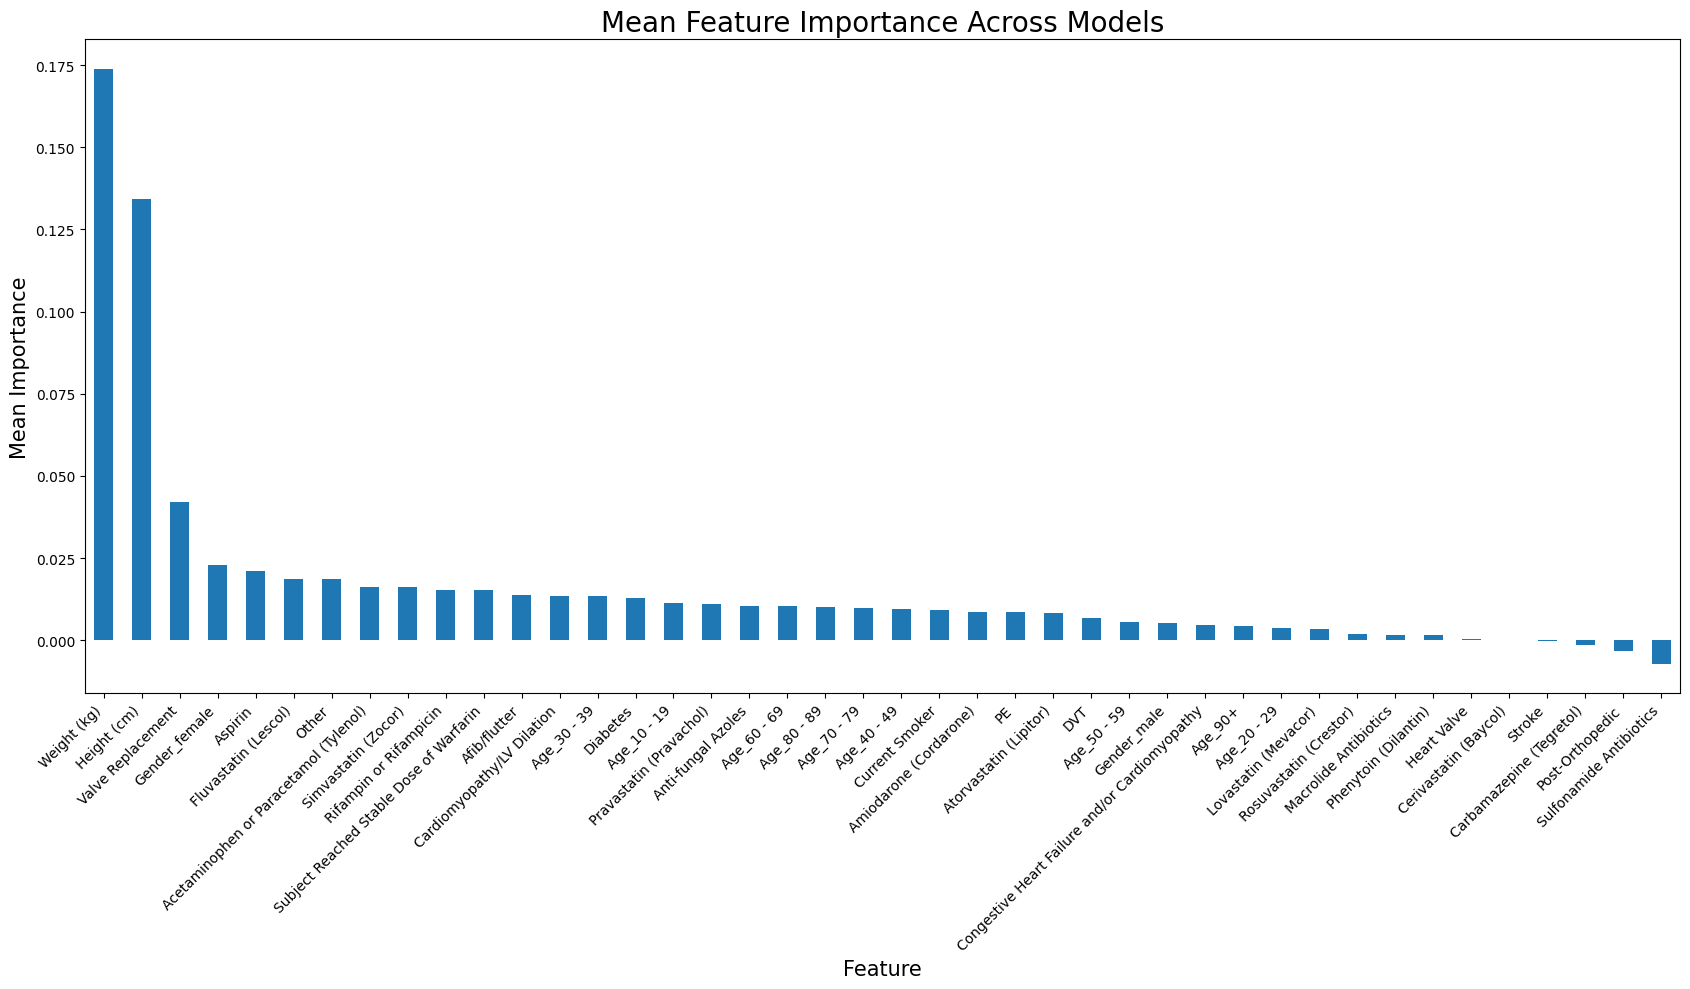

In [49]:
mean_importance = importance_df.mean()

plt.figure(figsize=(17, 10))
mean_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Mean Feature Importance Across Models', size=20)
plt.ylabel('Mean Importance', size=15)
plt.xlabel('Feature', size=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Box Plot

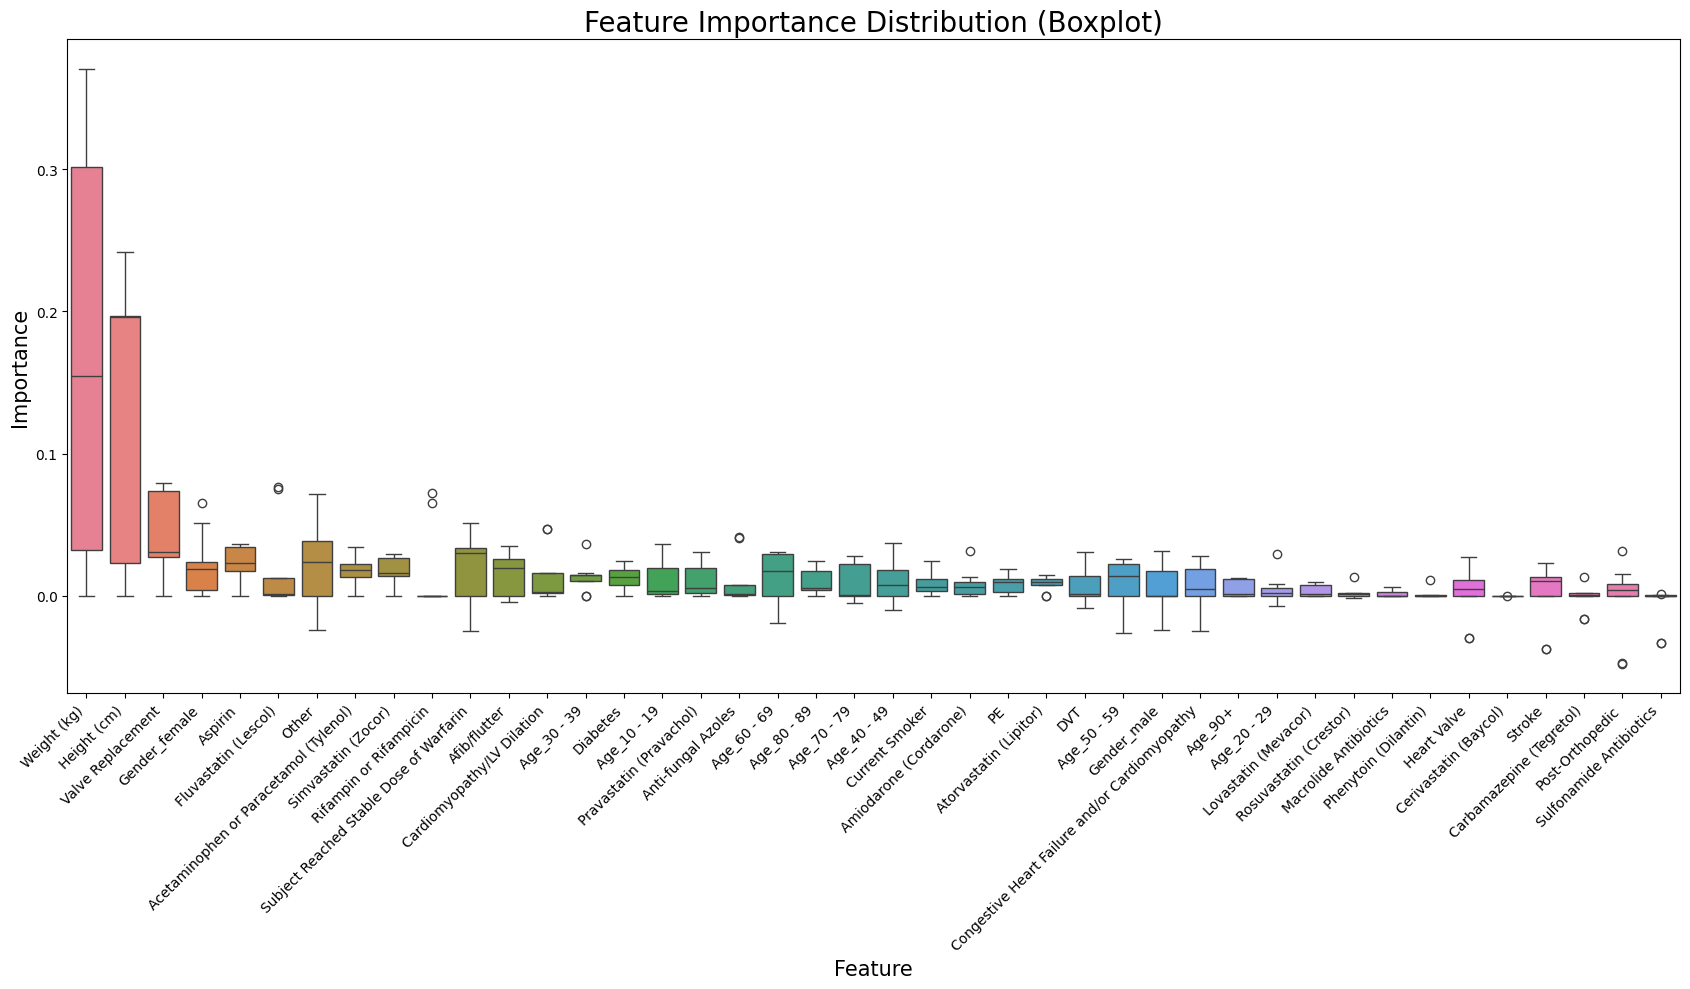

In [ ]:
plt.figure(figsize=(17, 10))
sns.boxplot(data=importance_df[mean_importance.sort_values(ascending=False).index])
plt.title('Feature Importance Distribution (Boxplot)', size=20)
plt.ylabel('Importance', size=15)
plt.xlabel('Feature', size=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Top 10 Feature Importances by Model

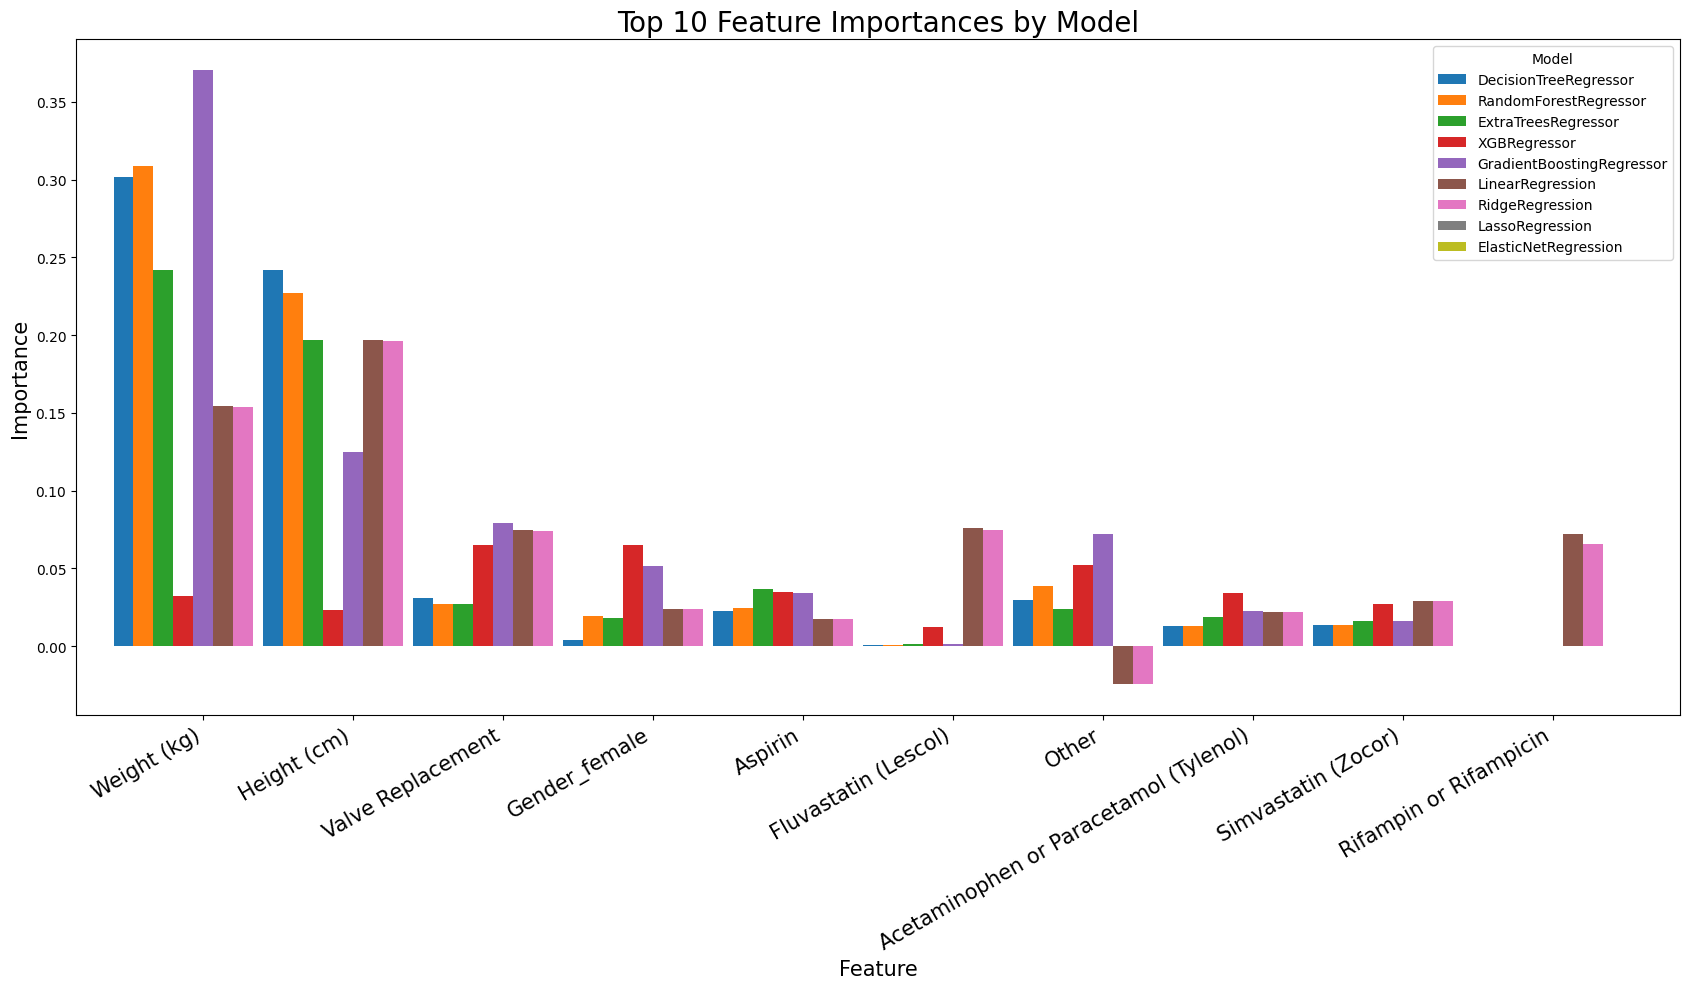

In [60]:
top_features = importance_df.mean().sort_values(ascending=False).head(10).index
importance_df[top_features].T.plot(kind='bar', figsize=(17, 10), width=1.2)

plt.title('Top 10 Feature Importances by Model', size=20)
plt.xlabel('Feature', size=15)
plt.ylabel('Importance', size=15)
plt.xticks(rotation=30, ha='right', size=15)
plt.tight_layout()
plt.show()

---
# Summary - Top Candidate Features (Based on Charts)  
---

### Very Strong Predictors:  
  
These appear consistently with high importance across all charts:  
	•	Weight (kg)  
	•	Height (cm)  
	•	Valve Replacement  
  
---
### Important Clinical Predictors:  
  
Strong influence in some models (especially ensemble or linear):  
	•	Gender_female / Gender_male  
	•	Aspirin  
	•	Fluvastatin (Lescol)  
	•	Acetaminophen or Paracetamol (Tylenol)  
	•	Other medications  
	•	Simvastatin (Zocor)  
	•	Rifampin or Rifampicin  
  
---
### Recommended Feature Set for Neural Network for Warfarin Dose Prediction  
  
Start with the following (about 12–15 features):  
	1.	Weight (kg)  
	2.	Height (cm)  
	3.	Valve Replacement  
	4.	Aspirin  
	5.	Fluvastatin (Lescol)  
	6.	Acetaminophen or Paracetamol (Tylenol)  
	7.	Simvastatin (Zocor)  
	8.	Rifampin or Rifampicin   
	9.	Subject Reached Stable Dose of Warfarin  
	10.	Age bins (reduce number of bins)  
	11. Gender_female / Gender_male
	12.	Amiodarone (Cordarone) if present in data  